In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer

#import my modules
import acquire as a
import prepare as p
import wrangle as w

# **Exercises**

Do your work for these exercises in a jupyter notebook named scaling. Use the zillow dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.



In [2]:
df = w.wrangle_zillow()
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
4,4,2.0,3633.0,296425.0,2005,6941.39,6037
6,3,4.0,1620.0,847770.0,2011,10244.94,6037
7,3,2.0,2077.0,646760.0,1926,7924.68,6037
18,3,1.0,1244.0,169471.0,1950,2532.88,6037
19,3,2.0,1300.0,233266.0,1950,3110.99,6037


In [3]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
print(train.shape, validate.shape, test.shape)

(1161886, 7) (497952, 7) (414960, 7)


In [4]:
train.columns

Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

# **Q1**
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [5]:
columns_to_scale = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxvaluedollarcnt']


In [6]:
train_scaled = train.copy()
scaler = MinMaxScaler()
train_scaled[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [7]:
train_scaled


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
775411,0.222222,0.100,0.000937,0.003751,1955,4389.82,6111
1160935,0.277778,0.125,0.001386,0.007173,1964,7491.44,6059
1558975,0.222222,0.100,0.000592,0.006488,1963,6410.34,6059
2049378,0.166667,0.050,0.000576,0.003656,1920,3876.27,6037
1250609,0.166667,0.100,0.000877,0.003492,1983,3794.69,6037
...,...,...,...,...,...,...,...
1458442,0.166667,0.100,0.000841,0.002207,1959,2593.98,6037
889840,0.222222,0.100,0.000822,0.003809,1977,4213.39,6037
554380,0.222222,0.150,0.001765,0.002930,1970,3107.96,6037
570725,0.277778,0.275,0.003671,0.009646,2015,9474.10,6059


In [8]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
775411,4,2.0,1692.0,330163.0,1955,4389.82,6111
1160935,5,2.5,2119.0,631368.0,1964,7491.44,6059
1558975,4,2.0,1363.0,571105.0,1963,6410.34,6059
2049378,3,1.0,1348.0,321859.0,1920,3876.27,6037
1250609,3,2.0,1635.0,307370.0,1983,3794.69,6037


Text(0, 0.5, 'Count')

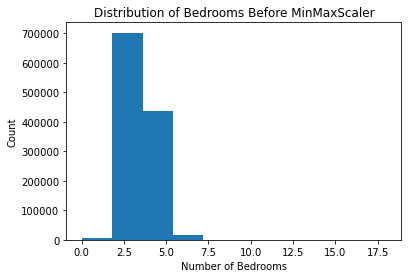

In [9]:
plt.hist(train.bedroomcnt)
plt.title('Distribution of Bedrooms Before MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

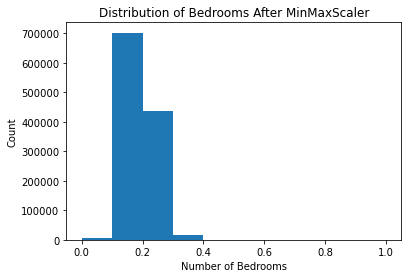

In [10]:
plt.hist(train_scaled.bedroomcnt)
plt.title('Distribution of Bedrooms After MinMaxScaler')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')

In [11]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(16,9))
    df_scaled = df.copy()
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()
#    return fig, axs

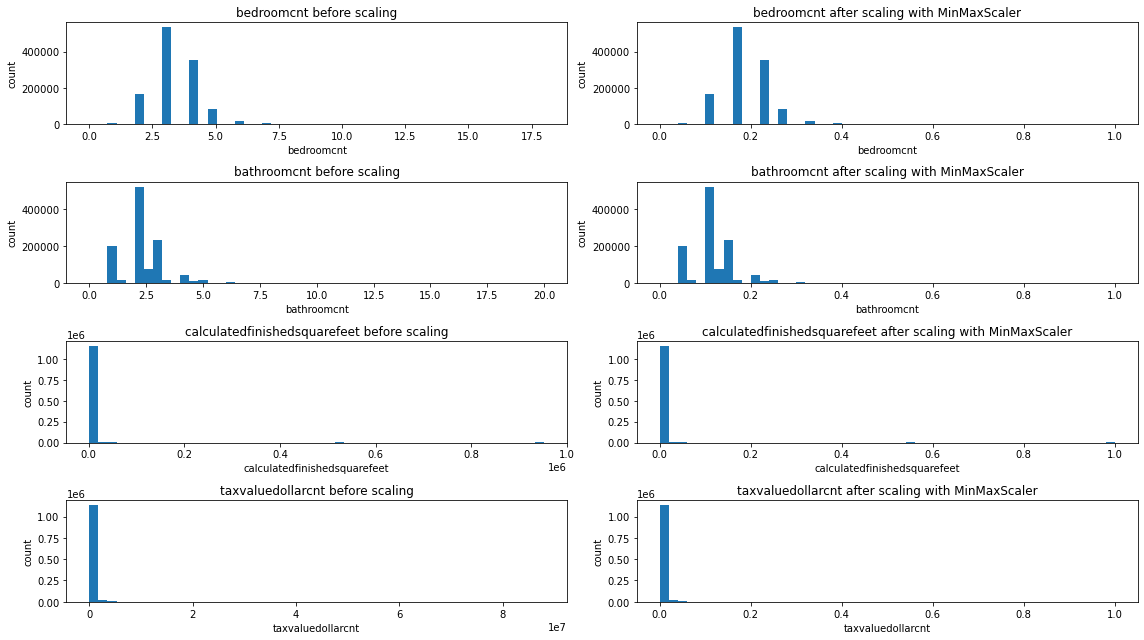

In [12]:
# MinMaxScaler Applied
visualize_scaler(scaler=MinMaxScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

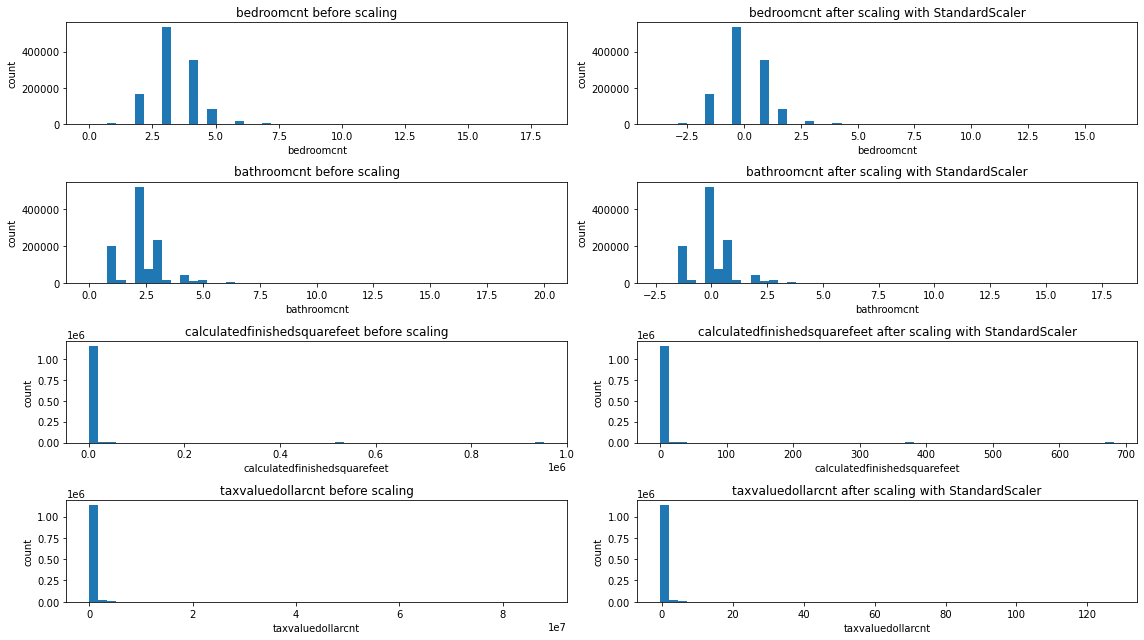

In [13]:
# StandardScaler Applied
visualize_scaler(scaler=StandardScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

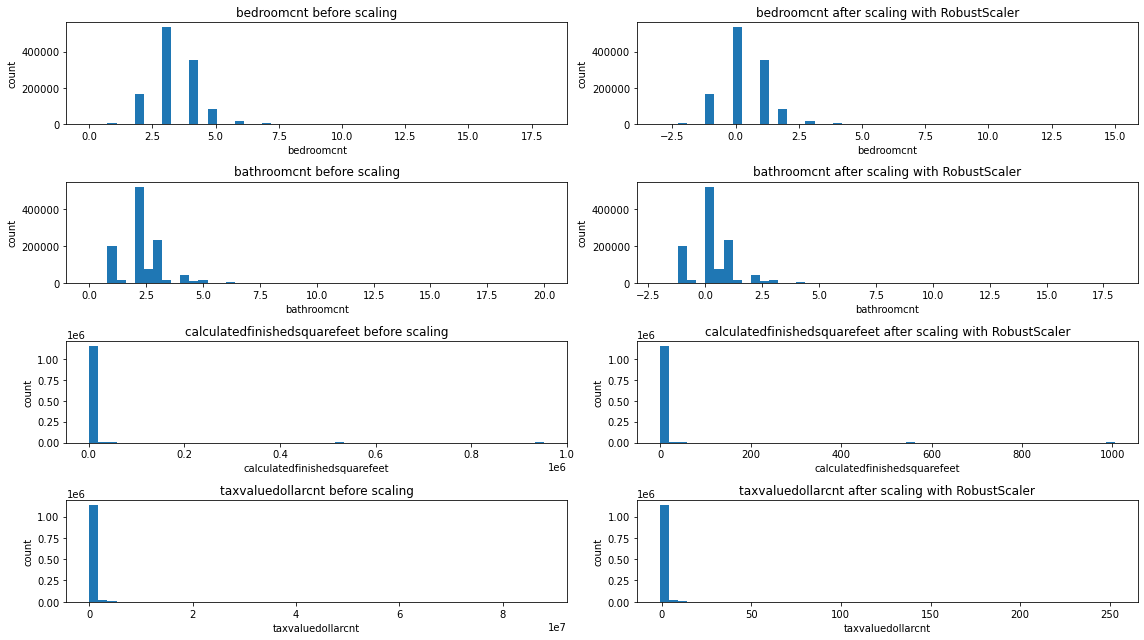

In [14]:
# RobustScaler Applied
visualize_scaler(scaler=RobustScaler(), df=train, columns_to_scale=columns_to_scale, bins=50)

# **Q2**
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?


In [15]:
scaler = MinMaxScaler()
original_data = train[['taxvaluedollarcnt']]
scaled_data = scaler.fit_transform(original_data)

In [16]:
scaled_data[:5]


array([[0.00375073],
       [0.00717272],
       [0.00648807],
       [0.00365639],
       [0.00349178]])

In [17]:
original_data[:5]


,taxvaluedollarcnt
775411,330163.0
1160935,631368.0
1558975,571105.0
2049378,321859.0
1250609,307370.0


In [18]:
scaler.inverse_transform(scaled_data)[:5]

array([[330163.],
       [631368.],
       [571105.],
       [321859.],
       [307370.]])

In [19]:
(scaler.inverse_transform(scaled_data) == original_data)

,taxvaluedollarcnt
775411,True
1160935,True
1558975,True
2049378,True
1250609,True
...,...
1458442,True
889840,True
554380,True
570725,True


# **Q3**
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.


**From sklearn.preprocessing.QuantileTransformer documentation:**

This method transforms the features to follow a uniform or a normal distribution. Therefore, for a given feature, this transformation tends to spread out the most frequent values. It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.

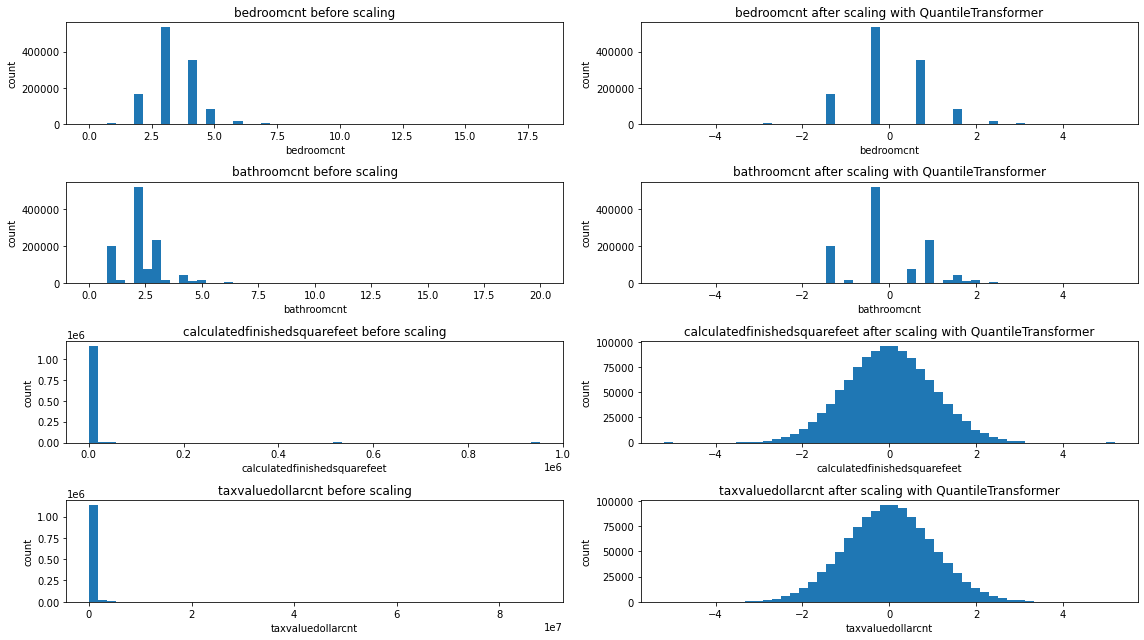

In [20]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(output_distribution='normal'), df=train, columns_to_scale=columns_to_scale, bins=50)

# **Q4**
Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

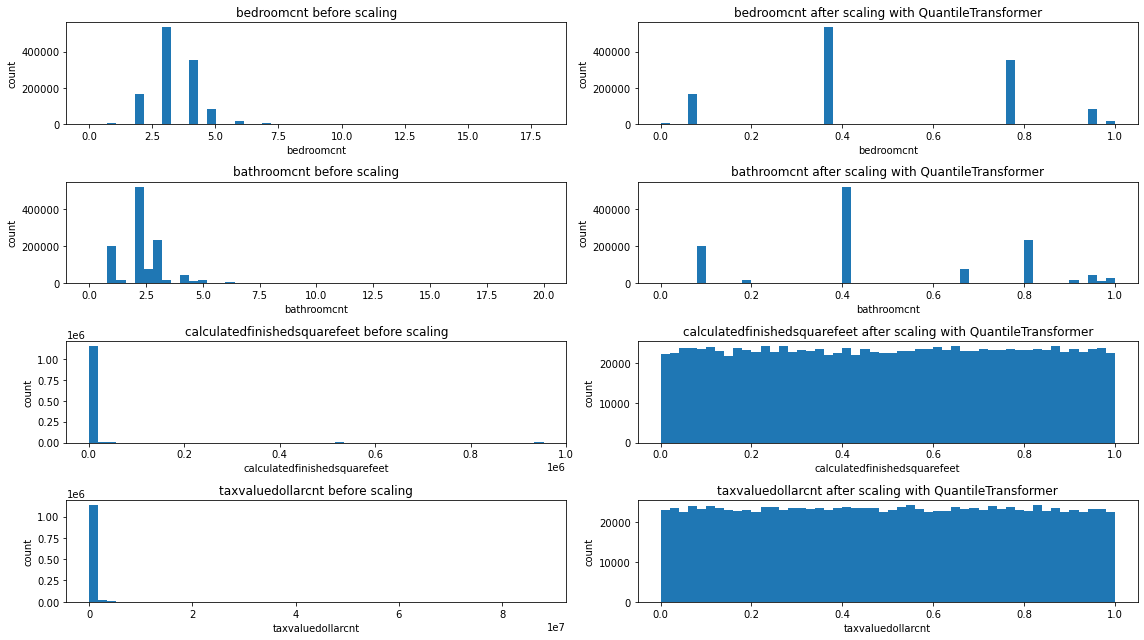

In [21]:
# QuantileTransformer Applied
visualize_scaler(scaler=QuantileTransformer(), df=train, columns_to_scale=columns_to_scale, bins=50)

# **Q5**
Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!


In [22]:
def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['bedroomcnt', 'bathroomcnt', 'taxvaluedollarcnt', 'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled


In [23]:
scaler, train_scaled, validate_scaled, test_scaled = scale_data(train, validate, test, return_scaler=True)


In [24]:
train_scaled


,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
775411,0.222222,0.100,0.000937,0.003751,1955,4389.82,6111
1160935,0.277778,0.125,0.001386,0.007173,1964,7491.44,6059
1558975,0.222222,0.100,0.000592,0.006488,1963,6410.34,6059
2049378,0.166667,0.050,0.000576,0.003656,1920,3876.27,6037
1250609,0.166667,0.100,0.000877,0.003492,1983,3794.69,6037
...,...,...,...,...,...,...,...
1458442,0.166667,0.100,0.000841,0.002207,1959,2593.98,6037
889840,0.222222,0.100,0.000822,0.003809,1977,4213.39,6037
554380,0.222222,0.150,0.001765,0.002930,1970,3107.96,6037
570725,0.277778,0.275,0.003671,0.009646,2015,9474.10,6059


In [25]:
validate_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1923870,0.166667,0.075,0.000829,0.003392,1951,3600.02,6059
1678877,0.222222,0.150,0.002292,0.005636,2001,6806.24,6037
1691515,0.166667,0.100,0.000256,0.002925,1954,3166.87,6037
473174,0.111111,0.100,0.000739,0.004689,1979,4195.38,6059
1057484,0.166667,0.100,0.000524,0.001475,1984,2438.91,6037
...,...,...,...,...,...,...,...
174247,0.222222,0.100,0.001080,0.000726,1954,849.51,6037
1604936,0.222222,0.125,0.001849,0.006820,1987,6769.48,6111
695585,0.222222,0.100,0.001086,0.004191,1965,4679.93,6037
1539934,0.222222,0.150,0.002320,0.006677,2015,6334.80,6111


In [26]:
test_scaled

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1882059,0.166667,0.125,0.001272,0.003833,1963,4001.30,6059
84044,0.222222,0.125,0.001625,0.001647,1973,6506.10,6059
1858206,0.222222,0.100,0.001412,0.003608,1977,4092.55,6037
1797882,0.166667,0.050,0.000260,0.002638,1956,3059.26,6059
1705079,0.111111,0.100,0.000712,0.015082,1940,15945.64,6037
...,...,...,...,...,...,...,...
167038,0.222222,0.100,0.000751,0.006677,1971,6833.80,6037
850119,0.166667,0.125,0.000770,0.002553,2000,3012.40,6059
1743556,0.277778,0.150,0.002306,0.010558,2000,9251.00,6059
1626472,0.222222,0.175,0.001744,0.001078,1968,1395.34,6111
